In [2]:
import os
os.chdir('../')  # Moving up one directory to the root

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data.data_processing import DataProcessor 
from utils.analysis import SentimentAnalysisVisualizer
from models.sentiment_model import ModelTrainer

2024-12-06 12:21:07.320835: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Create instances
visualizer = SentimentAnalysisVisualizer()
processor = DataProcessor()
trainer = ModelTrainer() 

In [4]:
# Load and explore the raw dataset
df = processor.load_data()

In [5]:
# Analyze ratings distribution
visualizer.analyze_ratings_distribution(df)

# Analyze sentiment distribution on the imbalanced dataset in terms of sentiment
visualizer.analyze_sentiment_distribution(df)


Rating Distribution:
Rating 0: 130,000 reviews (20.0%)
Rating 1: 130,000 reviews (20.0%)
Rating 2: 130,000 reviews (20.0%)
Rating 3: 130,000 reviews (20.0%)
Rating 4: 130,000 reviews (20.0%)

Sentiment Distribution:
Neutral: 260,000
Positive: 130,000
Positive: 260,000


In [6]:
df_balanced = processor.create_balanced_dataset(df)

In [7]:
print(f"Total samples: {len(df_balanced)}")
visualizer.analyze_sentiment_distribution(df_balanced)

Total samples: 6000

Sentiment Distribution:
Neutral: 2,000
Positive: 2,000
Positive: 2,000


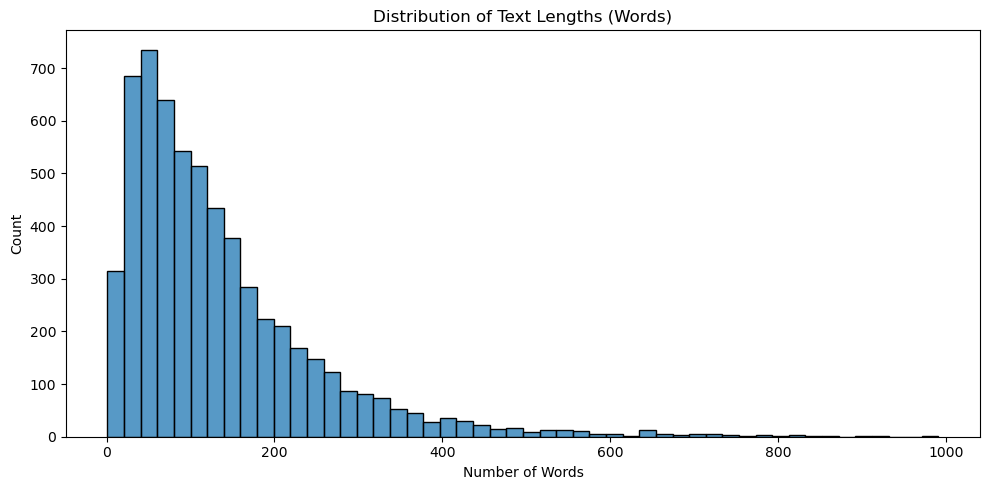


Text Length Statistics:

Word counts:
Average length: 135.1 words
Median length: 103.0 words
Max length: 991 words
Min length: 1 words


In [8]:
visualizer.analyze_text_lengths(df_balanced['text'])

In [9]:
sample_texts = df_balanced['text'].head(5)

print("Detailed preprocessing examples from dataset:\n")
for text in sample_texts:
    processed, is_sarcastic = processor.preprocess_text(text)
    print(f"Original: {text}\n\n")
    print(f"Processed: {processed}\n\n")
    print(f"Sarcastic: {is_sarcastic}\n\n")
    print("-" * 80 + "\n")

Detailed preprocessing examples from dataset:

Original: Used a Groupon today to eat here and they gave tiny portions compared to normal and a sharing charge for one of my little kids.    Food was ok but the restaurant is dirty and bathroom always out of order....Dont use a Groupon at this place as they rip you off on the food portions.


Processed: used a groupon today to eat here and they gave tiny portions compared to normal and a sharing charge for one of my little kids. food was ok but the restaurant is dirty and bathroom always out of order ELLIPSIS .dont use a groupon at this place as they rip you off on the food portions.


Sarcastic: False


--------------------------------------------------------------------------------

Original: Its definitely better than making my own sandwich...good soups that come in a bread bowl. Let's not get past the fact that its nothing fancy....average atmosphere with average service...I would recommend to anyone for a good sandwich and soup.


Pro

In [10]:
sample_batch = df_balanced['text'].head(100)
processed_texts, analysis = processor.process_batch(sample_batch)

print("Batch Analysis Statistics:")
print(f"Sarcasm detected: {analysis['sarcasm_count']}")
print(f"Negations found: {analysis['negation_count']}")
print(f"Special tokens: {analysis['special_tokens_count']}")
print(f"URLs found: {analysis['url_count']}")

Batch Analysis Statistics:
Sarcasm detected: 0
Negations found: 82
Special tokens: 0
URLs found: 0


In [11]:
print("Data Quality Checks:")
print("\nNull values:")
print(df_balanced.isnull().sum())
print("\nDuplicate rows:", df_balanced.duplicated().sum())

Data Quality Checks:

Null values:
label        0
text         0
sentiment    0
dtype: int64

Duplicate rows: 0


Token Length Statistics:
Mean: 146.1
Median: 137.0
95th percentile: 256.0
Max: 256


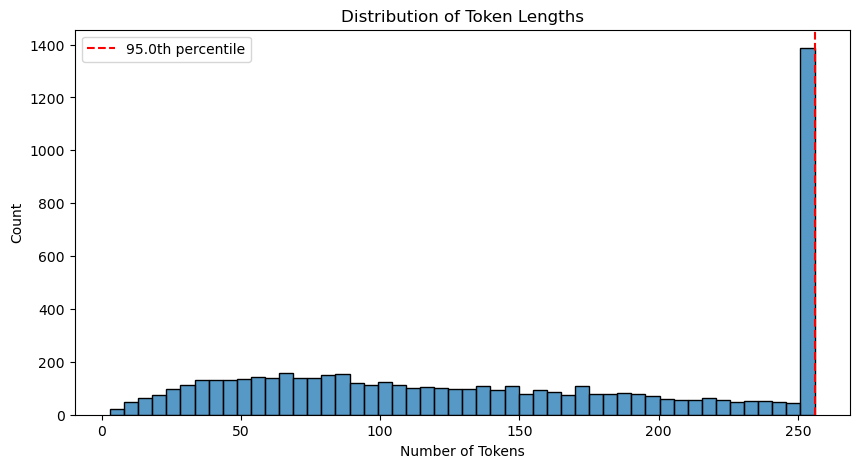


Recommended MAX_LENGTH: 256


In [12]:
# Get tokenized dataset from ModelTrainer
encoded_data = trainer.prepare_dataset(df_balanced['text'])

# Analyze token lengths
suggested_length = SentimentAnalysisVisualizer.analyze_token_lengths(encoded_data)
MAX_LENGTH = min(512, (suggested_length + 15) // 16 * 16)
print(f"\nRecommended MAX_LENGTH: {MAX_LENGTH}")

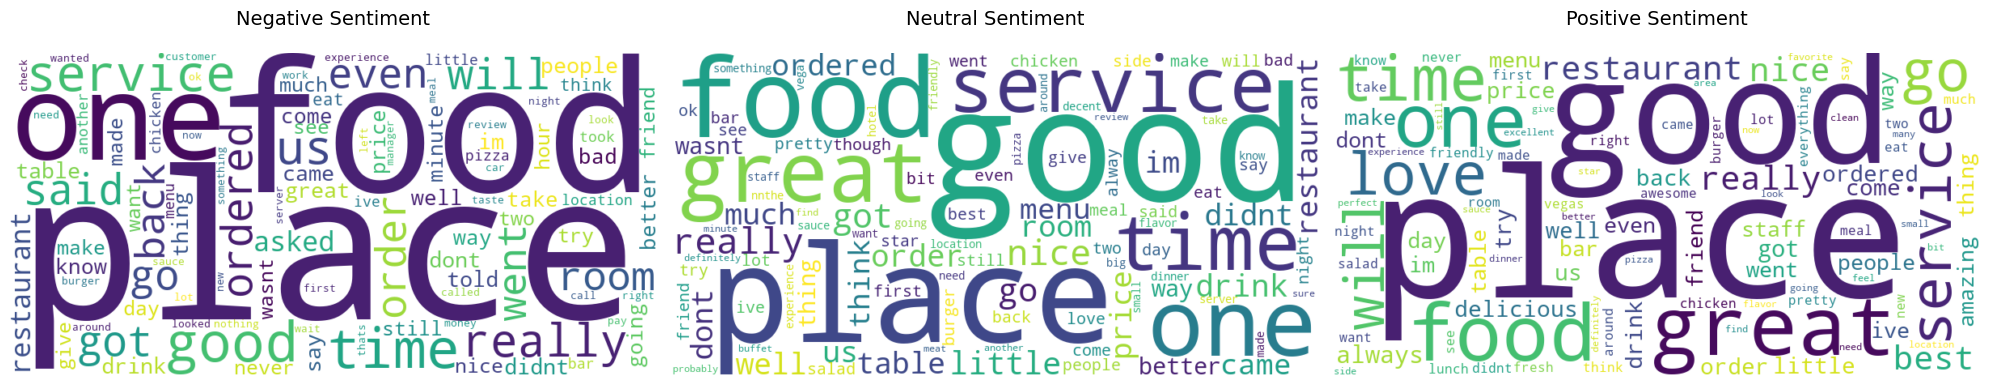


Most Common Words by Sentiment:

Negative:
  the: 14561
  and: 8923
  to: 8113
  was: 5718
  of: 4139
  it: 3881
  for: 3341
  in: 3334
  that: 2959
  is: 2699

Neutral:
  the: 14901
  and: 8346
  to: 6376
  was: 5533
  of: 4391
  it: 4056
  for: 3377
  is: 3332
  but: 3048
  in: 3045

Positive:
  the: 11495
  and: 8271
  to: 5357
  of: 3750
  was: 3612
  is: 3108
  it: 2764
  for: 2727
  in: 2713
  you: 2014


In [13]:
visualizer.visualize_sentiment_wordclouds(df_balanced)